[Amirhossein Mahmoudi](https://ammahmoudi.github.io)
# Lorenz System Bifurcation Diagram

In [18]:
import plotly.express as px
from matplotlib import pyplot as plt

# RK4 Method

In [11]:
import numpy as np


def Lorenz_D(t, r,rho=28,beta=8/3,sigma=10): 
    x, y, z = r
    return np.array([sigma*(y - x),  
                     rho*x - y - x*z, 
                     x*y - beta*z])   

def RK4(t, r, f, dt,rho=28,beta=8/3,sigma=10):
    k1 = dt*f(t=t,r= r,rho=rho,beta=beta,sigma=sigma)
    k2 = dt*f(t=t + dt/2,r= r + k1/2,rho=rho,beta=beta,sigma=sigma)
    k3 = dt*f(t=t + dt/2, r=r + k2/2,rho=rho,beta=beta,sigma=sigma)
    k4 = dt*f(t=t + dt,r= r + k3,rho=rho,beta=beta,sigma=sigma)
    return r + (k1 + 2*k2 + 2*k3 + k4)/6






In [12]:
#initial values
x0, y0, z0  = 0, 1, 10 
#parameters
sigma, beta = 10, 8/3
#initial time
t0 = 0      
#ending time
tf = 100   
#time step
dt = 0.008 # ... passo
t = np.arange(t0, tf + dt, dt)
n = len(t)

dr = 0.1  # parameter step size
r = np.arange(40, 200, dr)  # parameter range

result_rk4 = np.zeros((n, 3))
result_rk4[0]= [x0,y0,z0]
#local max and mins
r_maxes = []
z_maxes = []
r_mins = []
z_mins = []

for rho in r:
    #find solution for given rho
    for i in range(n - 1):
        result_rk4[i + 1] = RK4(t[i], [result_rk4[i,0], result_rk4[i,1], result_rk4[i,2]], Lorenz_D, dt,rho=rho,beta=beta,sigma=sigma)
    # calculate and save the peak values of the z coordinates
    for i in range(1, len(result_rk4) - 1):
        # save the local max
        if result_rk4[i - 1,2] < result_rk4[i,2] and result_rk4[i,2] > result_rk4[i + 1,2]:
            r_maxes.append(rho)
            z_maxes.append(result_rk4[i,2])
        # save the local min
        elif result_rk4[i - 1,2] > result_rk4[i,2] and result_rk4[i,2] < result_rk4[i + 1,2]:
            r_mins.append(rho)
            z_mins.append(result_rk4[i,2])
        #set last point is next initial point
        result_rk4[0]=result_rk4[i]


# Results

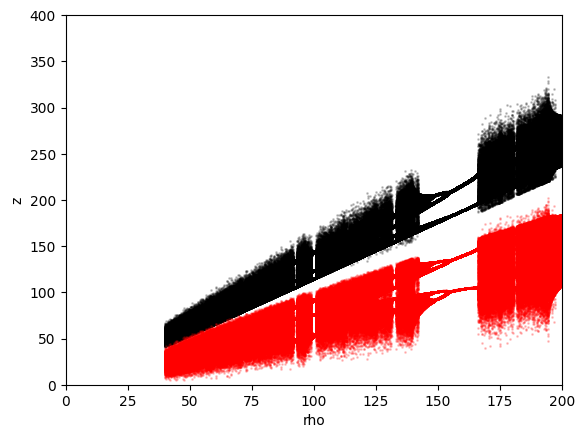

In [23]:
plt.scatter(r_maxes, z_maxes, color="black", s=0.5, alpha=0.2)
plt.scatter(r_mins, z_mins, color="red", s=0.5, alpha=0.2)

plt.xlim(0, 200)
plt.ylim(0, 400)
plt.xlabel('rho')
plt.ylabel('z')
plt.show()